In [1]:
#v1 report
import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa

modelv1b0 = load_model('H:\\article\\modelstrainedv1test1-701515\\efficientnetv1b0best.h5')
modelv1b1 = load_model('H:\\article\\modelstrainedv1test1-701515\\efficientnetv1b1best.h5')
modelv1b2 = load_model('H:\\article\\modelstrainedv1test1-701515\\efficientnetv1b2best.h5')
modelv1b3 = load_model('H:\\article\\modelstrainedv1test1-701515\\efficientnetv1b3best.h5')
modelv1b4 = load_model('H:\\article\\modelstrainedv1test1-701515\\efficientnetv1b4best.h5')

base_input_shapev1b0 = modelv1b0.input_shape[1:]
base_input_shapev1b1 = modelv1b1.input_shape[1:]
base_input_shapev1b2 = modelv1b2.input_shape[1:]
base_input_shapev1b3 = modelv1b3.input_shape[1:]
base_input_shapev1b4 = modelv1b4.input_shape[1:]


C:\Users\mahdi\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Found 1182 files belonging to 2 classes.
74/74 [==============================] - 153s 2s/step


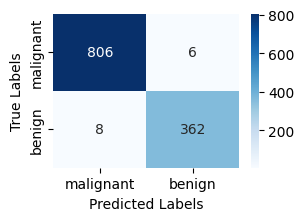


Metrics:
accuracy: 0.9882
precision: 0.9902
recall: 0.9926
F1-Score: 0.9914
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549AB-200-008.png
H:\article\1\test\benign\SOB_B_A-14-22549AB-400-017.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-004.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-005.png
H:\article\1\test\benign\SOB_B_F-14-23222AB-400-001.png
H:\article\1\test\benign\SOB_B_F-14-25197-200-063.png
H:\article\1\test\benign\SOB_B_F-14-29960AB-400-001.png
H:\article\1\test\benign\SOB_B_PT-14-21998AB-40-057.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-200-018.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-200-019.png
H:\article\1\test\malignant\SOB_M_LC-14-15570-100-016.png
H:\article\1\test\malignant\SOB_M_MC-14-18842D-100-012.png
H:\article\1\test\malignant\SOB_M_PC-14-15687B-200-005.png
H:\article\1\test\malignant\SOB_M_PC-15-190EF-40-010.png


In [3]:
#v1b0
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev1b0[:2], 
    batch_size=batch_size,
    shuffle=False,
)

y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv1b0.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

Found 1182 files belonging to 2 classes.
74/74 [==============================] - 230s 3s/step


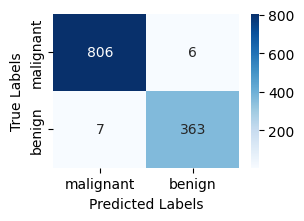


Metrics:
accuracy: 0.9890
precision: 0.9914
recall: 0.9926
F1-Score: 0.9920
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549AB-200-008.png
H:\article\1\test\benign\SOB_B_A-14-22549AB-40-026.png
H:\article\1\test\benign\SOB_B_A-14-22549CD-100-029.png
H:\article\1\test\benign\SOB_B_A-14-22549CD-400-018.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-004.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-005.png
H:\article\1\test\benign\SOB_B_F-14-23060AB-400-006.png
H:\article\1\test\malignant\SOB_M_LC-14-15570-100-016.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-100-005.png
H:\article\1\test\malignant\SOB_M_MC-14-16456-200-057.png
H:\article\1\test\malignant\SOB_M_MC-14-19979C-100-008.png
H:\article\1\test\malignant\SOB_M_PC-14-15687B-200-005.png
H:\article\1\test\malignant\SOB_M_PC-14-9146-40-023.png


In [5]:
#v1b1
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev1b1[:2], 
    batch_size=batch_size,
    shuffle=False,
)

y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv1b1.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.title('Confusion Matrix EfficientNetV1b1')
plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

Found 1182 files belonging to 2 classes.
74/74 [==============================] - 325s 4s/step


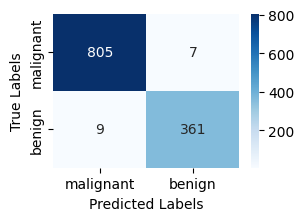


Metrics:
accuracy: 0.9865
precision: 0.9889
recall: 0.9914
F1-Score: 0.9902
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549AB-200-008.png
H:\article\1\test\benign\SOB_B_A-14-22549AB-400-017.png
H:\article\1\test\benign\SOB_B_A-14-22549G-100-017.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-005.png
H:\article\1\test\benign\SOB_B_F-14-25197-400-063.png
H:\article\1\test\benign\SOB_B_F-14-29960AB-400-001.png
H:\article\1\test\benign\SOB_B_F-14-29960AB-400-007.png
H:\article\1\test\benign\SOB_B_F-14-9133-200-025.png
H:\article\1\test\benign\SOB_B_TA-14-16184CD-400-026.png
H:\article\1\test\malignant\SOB_M_DC-14-10926-100-009.png
H:\article\1\test\malignant\SOB_M_DC-14-14946-40-012.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-100-026.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-200-004.png
H:\article\1\test\malignant\SOB_M_PC-14-15687B-200-009.png
H:\article\1\test\malignant\SOB_M_PC-14-9146-40-023.png
H:\article\1\test\malignant\SOB_M_PC-15-190EF-400-009.p

In [9]:
#v1b2
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev1b2[:2], 
    batch_size=batch_size,
    shuffle=False,
)


y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv1b2.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

Found 1182 files belonging to 2 classes.
74/74 [==============================] - 595s 8s/step


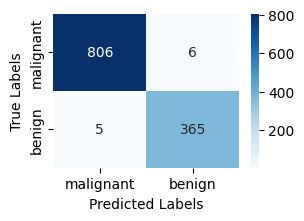


Metrics:
accuracy: 0.9907
precision: 0.9938
recall: 0.9926
F1-Score: 0.9932
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549AB-40-026.png
H:\article\1\test\benign\SOB_B_A-14-22549CD-100-029.png
H:\article\1\test\benign\SOB_B_A-14-22549G-100-017.png
H:\article\1\test\benign\SOB_B_F-14-29960AB-400-001.png
H:\article\1\test\benign\SOB_B_PT-14-21998AB-40-057.png
H:\article\1\test\malignant\SOB_M_LC-14-15570-400-018.png
H:\article\1\test\malignant\SOB_M_LC-14-15570C-40-031.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-200-004.png
H:\article\1\test\malignant\SOB_M_MC-14-19979C-100-008.png
H:\article\1\test\malignant\SOB_M_PC-14-15687B-200-009.png
H:\article\1\test\malignant\SOB_M_PC-15-190EF-400-009.png


In [10]:
#v1b3
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev1b3[:2], 
    batch_size=batch_size,
    shuffle=False,
)


y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv1b3.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

Found 1182 files belonging to 2 classes.
74/74 [==============================] - 1124s 15s/step


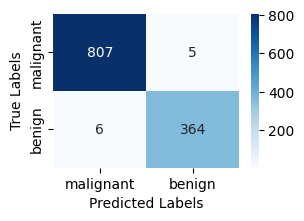


Metrics:
accuracy: 0.9907
precision: 0.9926
recall: 0.9938
F1-Score: 0.9932
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549CD-400-018.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-005.png
H:\article\1\test\benign\SOB_B_PT-14-21998AB-40-057.png
H:\article\1\test\benign\SOB_B_PT-14-21998AB-400-041.png
H:\article\1\test\benign\SOB_B_TA-14-16184CD-100-017.png
H:\article\1\test\benign\SOB_B_TA-14-16184CD-400-026.png
H:\article\1\test\malignant\SOB_M_DC-14-16448-400-004.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-100-026.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-200-011.png
H:\article\1\test\malignant\SOB_M_LC-14-15570-400-018.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-200-004.png


In [11]:
#v1b4
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev1b4[:2], 
    batch_size=batch_size,
    shuffle=False,
)


y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv1b4.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3,2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

In [15]:
#v2
import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa

modelv2b0 = load_model('H:\\article\\modelstrainedv2test1-701515\\efficientnetv2b0best.h5')
modelv2b1 = load_model('H:\\article\\modelstrainedv2test1-701515\\efficientnetv2b1best.h5')
modelv2b2 = load_model('H:\\article\\modelstrainedv2test1-701515\\efficientnetv2b2best.h5')
modelv2b3 = load_model('H:\\article\\modelstrainedv2test1-701515\\efficientnetv2b3best.h5')
modelv2bs = load_model('H:\\article\\modelstrainedv2test1-701515\\efficientnetv2bsbest.h5')

base_input_shapev2b0 = modelv2b0.input_shape[1:]
base_input_shapev2b1 = modelv2b1.input_shape[1:]
base_input_shapev2b2 = modelv2b2.input_shape[1:]
base_input_shapev2b3 = modelv2b3.input_shape[1:]
base_input_shapev2bs = modelv2bs.input_shape[1:]


Found 1182 files belonging to 2 classes.
74/74 [==============================] - 123s 2s/step


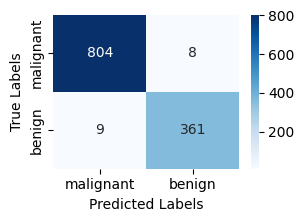


Metrics:
accuracy: 0.9856
precision: 0.9889
recall: 0.9901
F1-Score: 0.9895
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549AB-200-008.png
H:\article\1\test\benign\SOB_B_A-14-22549AB-40-026.png
H:\article\1\test\benign\SOB_B_A-14-22549AB-400-017.png
H:\article\1\test\benign\SOB_B_A-14-22549CD-400-018.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-004.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-005.png
H:\article\1\test\benign\SOB_B_F-14-29960AB-400-001.png
H:\article\1\test\benign\SOB_B_PT-14-21998AB-40-057.png
H:\article\1\test\benign\SOB_B_PT-14-21998AB-400-041.png
H:\article\1\test\malignant\SOB_M_DC-14-4364-40-001.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-100-005.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-200-004.png
H:\article\1\test\malignant\SOB_M_MC-14-18842D-100-012.png
H:\article\1\test\malignant\SOB_M_PC-14-15687B-200-005.png
H:\article\1\test\malignant\SOB_M_PC-14-19440-40-028.png
H:\article\1\test\malignant\SOB_M_PC-14-9146-100-

In [17]:
#v2b0
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev2b0[:2], 
    batch_size=batch_size,
    shuffle=False,
)

y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv2b0.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

Found 1182 files belonging to 2 classes.
74/74 [==============================] - 199s 3s/step


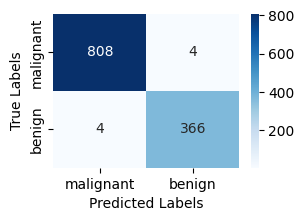


Metrics:
accuracy: 0.9932
precision: 0.9951
recall: 0.9951
F1-Score: 0.9951
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549AB-200-008.png
H:\article\1\test\benign\SOB_B_A-14-22549AB-400-017.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-005.png
H:\article\1\test\benign\SOB_B_F-14-29960AB-400-001.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-100-026.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-200-004.png
H:\article\1\test\malignant\SOB_M_MC-14-12773-100-001.png
H:\article\1\test\malignant\SOB_M_PC-14-15687B-200-005.png


In [18]:
#v2b1
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev2b1[:2], 
    batch_size=batch_size,
    shuffle=False,
)


y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv2b1.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

Found 1182 files belonging to 2 classes.
74/74 [==============================] - 231s 3s/step


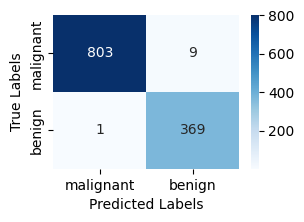


Metrics:
accuracy: 0.9915
precision: 0.9988
recall: 0.9889
F1-Score: 0.9938
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549AB-40-026.png
H:\article\1\test\malignant\SOB_M_DC-14-10926-100-009.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-100-026.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-100-005.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-200-004.png
H:\article\1\test\malignant\SOB_M_MC-14-12773-100-001.png
H:\article\1\test\malignant\SOB_M_MC-14-16456-200-057.png
H:\article\1\test\malignant\SOB_M_MC-14-18842D-100-012.png
H:\article\1\test\malignant\SOB_M_PC-14-19440-200-022.png
H:\article\1\test\malignant\SOB_M_PC-15-190EF-40-010.png


In [19]:
#v2b2
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev2b2[:2], 
    batch_size=batch_size,
    shuffle=False,
)

y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv2b2.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

Found 1182 files belonging to 2 classes.
74/74 [==============================] - 389s 5s/step


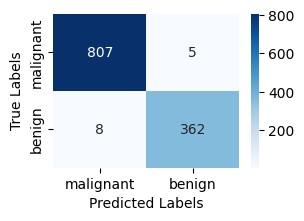


Metrics:
accuracy: 0.9890
precision: 0.9902
recall: 0.9938
F1-Score: 0.9920
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549CD-100-029.png
H:\article\1\test\benign\SOB_B_A-14-22549G-100-017.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-004.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-005.png
H:\article\1\test\benign\SOB_B_F-14-23060AB-400-006.png
H:\article\1\test\benign\SOB_B_F-14-23222AB-400-001.png
H:\article\1\test\benign\SOB_B_F-14-25197-40-041.png
H:\article\1\test\benign\SOB_B_PT-14-21998AB-40-057.png
H:\article\1\test\malignant\SOB_M_DC-14-10926-100-009.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-200-004.png
H:\article\1\test\malignant\SOB_M_MC-14-18842D-100-012.png
H:\article\1\test\malignant\SOB_M_MC-14-18842D-400-009.png
H:\article\1\test\malignant\SOB_M_PC-14-15687B-200-005.png


In [20]:
#v2b3
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev2b3[:2], 
    batch_size=batch_size,
    shuffle=False,
)

y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv2b3.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

Found 1182 files belonging to 2 classes.
74/74 [==============================] - 818s 11s/step


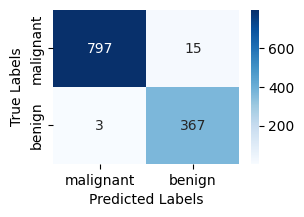


Metrics:
accuracy: 0.9848
precision: 0.9962
recall: 0.9815
F1-Score: 0.9888
misclassified filenames:
H:\article\1\test\benign\SOB_B_A-14-22549CD-400-018.png
H:\article\1\test\benign\SOB_B_A-14-22549G-200-005.png
H:\article\1\test\benign\SOB_B_PT-14-21998AB-400-041.png
H:\article\1\test\malignant\SOB_M_DC-14-10926-100-006.png
H:\article\1\test\malignant\SOB_M_DC-14-2773-400-003.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-100-026.png
H:\article\1\test\malignant\SOB_M_DC-14-3909-200-019.png
H:\article\1\test\malignant\SOB_M_LC-14-15570-100-012.png
H:\article\1\test\malignant\SOB_M_LC-14-15570-400-018.png
H:\article\1\test\malignant\SOB_M_MC-14-10147-200-004.png
H:\article\1\test\malignant\SOB_M_MC-14-12773-400-011.png
H:\article\1\test\malignant\SOB_M_MC-14-13418DE-400-009.png
H:\article\1\test\malignant\SOB_M_MC-14-18842D-400-007.png
H:\article\1\test\malignant\SOB_M_MC-14-18842D-400-009.png
H:\article\1\test\malignant\SOB_M_MC-14-19979-400-004.png
H:\article\1\test\malignant\SOB_M

In [21]:
#v2bs
import numpy as np
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

batch_size = 16


test_ds = image_dataset_from_directory(
    directory="H:\\article\\1\\test", 
    image_size=base_input_shapev2bs[:2], 
    batch_size=batch_size,
    shuffle=False,
)

y_true = np.concatenate([y for x, y in test_ds], axis=0) 
y_pred = modelv2bs.predict(test_ds)  
y_pred = np.argmax(y_pred, axis=1) 


cm = confusion_matrix(y_true, y_pred)


desired_class_order = ['malignant', 'benign']
current_class_order = test_ds.class_names
order_mapping = [current_class_order.index(cls) for cls in desired_class_order]
cm_reordered = cm[order_mapping, :][:, order_mapping]


plt.figure(figsize=(3, 2))
sns.heatmap(cm_reordered, annot=True, fmt='d', cmap='Blues', 
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')


print("\nMetrics:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

misclassified_indices = np.where(y_true != y_pred)[0]
file_paths = test_ds.file_paths 
misclassified_files = [file_paths[i] for i in misclassified_indices]

print("misclassified filenames:")
for file in misclassified_files:
    print(file)

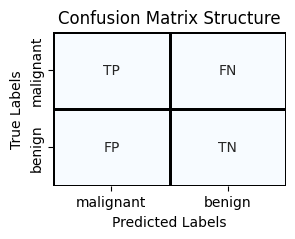

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


cm_empty = np.zeros((2, 2))

desired_class_order = ['malignant', 'benign']

plt.figure(figsize=(3, 2))
sns.heatmap(cm_empty, annot=[['TP', 'FN'], ['FP', 'TN']], fmt='', cmap='Blues',
            xticklabels=desired_class_order, 
            yticklabels=desired_class_order, 
            linewidths=1, linecolor='black', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Structure')
plt.show()


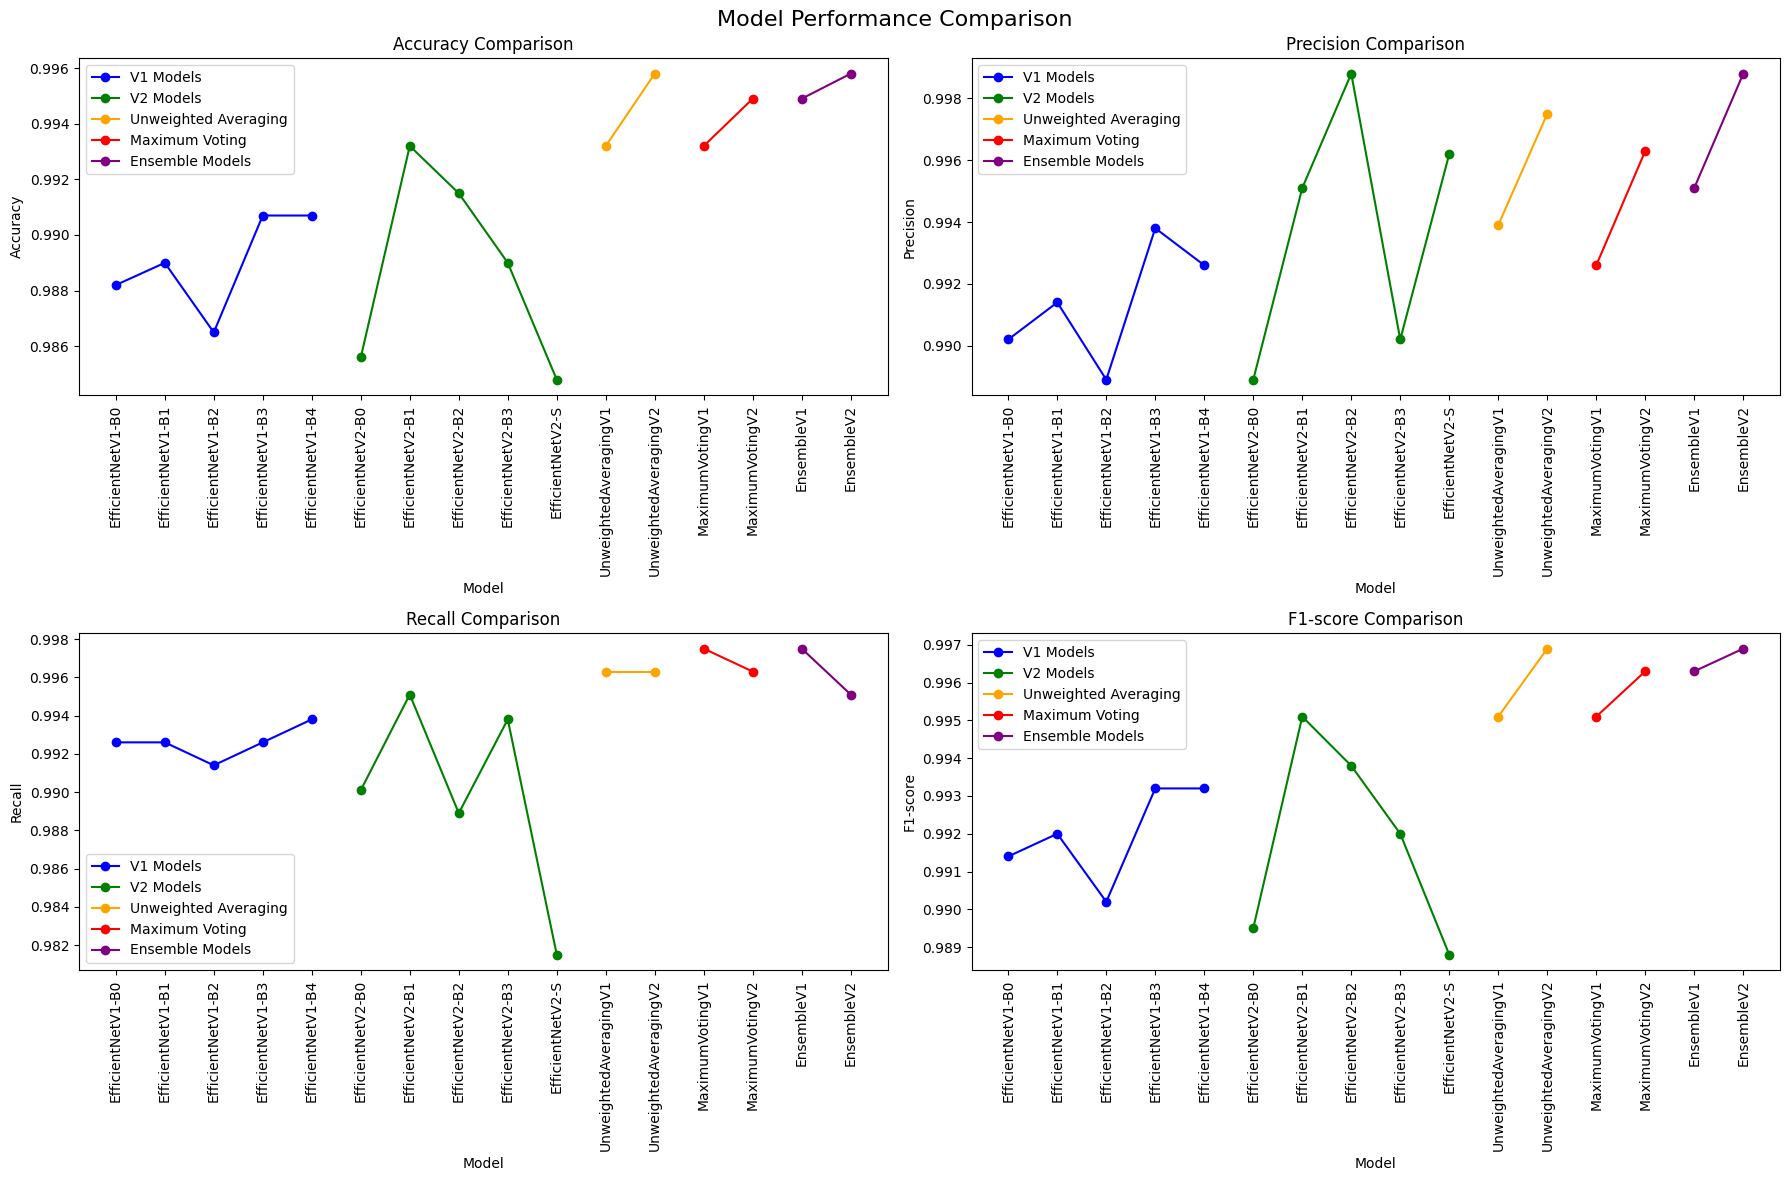

In [14]:
import matplotlib.pyplot as plt
import numpy as np
models_v1 = ['EfficientNetV1-B0', 'EfficientNetV1-B1', 'EfficientNetV1-B2', 'EfficientNetV1-B3', 'EfficientNetV1-B4']
models_v2 = ['EfficientNetV2-B0', 'EfficientNetV2-B1', 'EfficientNetV2-B2', 'EfficientNetV2-B3', 'EfficientNetV2-S']
models_UA = ['UnweightedAveragingV1', 'UnweightedAveragingV2']
models_MV = ['MaximumVotingV1', 'MaximumVotingV2']
models_EN = ['EnsembleV1', 'EnsembleV2']

# accuracy
accuracy_v1 = [0.9882, 0.9890, 0.9865, 0.9907, 0.9907]
accuracy_v2 = [0.9856, 0.9932, 0.9915, 0.9890, 0.9848]
accuracy_UA = [0.9932, 0.9958]
accuracy_MV = [0.9932, 0.9949]
accuracy_EN = [0.9949, 0.9958]

# precision
precision_v1 = [0.9902, 0.9914, 0.9889, 0.9938, 0.9926]
precision_v2 = [0.9889, 0.9951, 0.9988, 0.9902, 0.9962]
precision_UA = [0.9939, 0.9975]
precision_MV = [0.9926, 0.9963]
precision_EN = [0.9951, 0.9988]

# recall
recall_v1 = [0.9926, 0.9926, 0.9914, 0.9926, 0.9938]
recall_v2 = [0.9901, 0.9951, 0.9889, 0.9938, 0.9815]
recall_UA = [0.9963, 0.9963]
recall_MV = [0.9975, 0.9963]
recall_EN = [0.9975, 0.9951]

# f1-score
f1_v1 = [0.9914, 0.9920, 0.9902, 0.9932, 0.9932]
f1_v2 = [0.9895, 0.9951, 0.9938, 0.9920, 0.9888]
f1_UA = [0.9951, 0.9969]
f1_MV = [0.9951, 0.9963]
f1_EN = [0.9963, 0.9969]


fig, ax = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16)

# accuracy plot
ax[0, 0].plot(models_v1, accuracy_v1, label="V1 Models", marker='o', color='blue')
ax[0, 0].plot(models_v2, accuracy_v2, label="V2 Models", marker='o', color='green')
ax[0, 0].plot(models_UA, accuracy_UA, label="Unweighted Averaging", marker='o', color='orange')
ax[0, 0].plot(models_MV, accuracy_MV, label="Maximum Voting", marker='o', color='red')
ax[0, 0].plot(models_EN, accuracy_EN, label="Ensemble Models", marker='o', color='purple')
ax[0, 0].set_title('Accuracy Comparison')
ax[0, 0].set_xlabel('Model')
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_xticks(range(len(models_v1 + models_v2 + models_UA + models_MV + models_EN)))
ax[0, 0].set_xticklabels(models_v1 + models_v2 + models_UA + models_MV + models_EN, rotation=90)
ax[0, 0].legend()

# precision 
ax[0, 1].plot(models_v1, precision_v1, label="V1 Models", marker='o', color='blue')
ax[0, 1].plot(models_v2, precision_v2, label="V2 Models", marker='o', color='green')
ax[0, 1].plot(models_UA, precision_UA, label="Unweighted Averaging", marker='o', color='orange')
ax[0, 1].plot(models_MV, precision_MV, label="Maximum Voting", marker='o', color='red')
ax[0, 1].plot(models_EN, precision_EN, label="Ensemble Models", marker='o', color='purple')
ax[0, 1].set_title('Precision Comparison')
ax[0, 1].set_xlabel('Model')
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_xticks(range(len(models_v1 + models_v2 + models_UA + models_MV + models_EN)))
ax[0, 1].set_xticklabels(models_v1 + models_v2 + models_UA + models_MV + models_EN, rotation=90)
ax[0, 1].legend()

# recall
ax[1, 0].plot(models_v1, recall_v1, label="V1 Models", marker='o', color='blue')
ax[1, 0].plot(models_v2, recall_v2, label="V2 Models", marker='o', color='green')
ax[1, 0].plot(models_UA, recall_UA, label="Unweighted Averaging", marker='o', color='orange')
ax[1, 0].plot(models_MV, recall_MV, label="Maximum Voting", marker='o', color='red')
ax[1, 0].plot(models_EN, recall_EN, label="Ensemble Models", marker='o', color='purple')
ax[1, 0].set_title('Recall Comparison')
ax[1, 0].set_xlabel('Model')
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_xticks(range(len(models_v1 + models_v2 + models_UA + models_MV + models_EN)))
ax[1, 0].set_xticklabels(models_v1 + models_v2 + models_UA + models_MV + models_EN, rotation=90)
ax[1, 0].legend()

# f1-score 
ax[1, 1].plot(models_v1, f1_v1, label="V1 Models", marker='o', color='blue')
ax[1, 1].plot(models_v2, f1_v2, label="V2 Models", marker='o', color='green')
ax[1, 1].plot(models_UA, f1_UA, label="Unweighted Averaging", marker='o', color='orange')
ax[1, 1].plot(models_MV, f1_MV, label="Maximum Voting", marker='o', color='red')
ax[1, 1].plot(models_EN, f1_EN, label="Ensemble Models", marker='o', color='purple')
ax[1, 1].set_title('F1-score Comparison')
ax[1, 1].set_xlabel('Model')
ax[1, 1].set_ylabel('F1-score')
ax[1, 1].set_xticks(range(len(models_v1 + models_v2 + models_UA + models_MV + models_EN)))
ax[1, 1].set_xticklabels(models_v1 + models_v2 + models_UA + models_MV + models_EN, rotation=90)
ax[1, 1].legend()
plt.tight_layout()

plt.show()